In [4]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
from IPython.display import display, HTML
import os
import pandas as pd
# matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


# Data
The data consist of 
   1. localizations: a collection of x,y,z,t measurements of particle positions.
   2. medial axis curves: an ordered collection of x,y,z representing the curve that runs along the middle of each tube-like hypha
 
Note that x,y,z coordinates are given in 'pixel' units and he times are listed in 'frames' units (see below for conversion factors to micrometers and seconds).

Note that the data are subdivided into groups representing an individual 'hypha', which is a tube-like section of the cell.

Particle localizations are taken from a single 3D video. The following video is a 'max projection': a 2D video for visualization purposes. 

The original video is a time sequence of 139 volumes (each volume is a stack of 17 images at different z positions). The pixel spacing is `dx = 0.11029267` micrometers between pixel centers. The time between each volume is `dt=0.8886678` seconds.

### Our paper
https://www.molbiolcell.org/doi/abs/10.1091/mbc.E20-03-0210

In [5]:
HTML("""<video width="512" height="512" 
controls autoplay loop 
src="https://github.com/newby-jay/SSC_Workshop_2021/blob/main/Project%20GEMS/gems_wtNoNuc007%20(max%20projection%20video).mp4?raw=true">
""")

## Example of loading one file using Pandas

In [6]:
localizations = pd.read_csv('./Localizations/Hypha_1(localizations).csv')
localizations

,x,y,z,t,minimum distance to cell surface
0,580.958958,1153.341453,0.083023,0.000000,3.526963
1,441.753403,816.942368,1.517624,0.000000,1.450847
2,476.264283,902.332560,3.619240,0.052888,4.315959
3,464.265727,868.440887,2.487457,0.052888,1.834160
4,595.275607,1139.585521,2.111611,0.052888,1.781943
5,418.719712,783.196565,2.906376,0.052888,2.842204
6,425.519971,803.548333,5.288373,0.105776,3.838704
7,497.952298,961.496082,4.820580,0.105776,2.228921
8,444.788164,846.771464,5.281706,0.105776,4.607355
9,465.890723,847.767997,5.197746,0.105776,3.665101


In [7]:
medial_axis = pd.read_csv('./Medial axis curves/Hypha_1(medial axis).csv')
medial_axis

,x,y,z
0,378.376430,705.389780,22.340248
1,379.530183,707.144310,22.226827
2,380.501088,708.595100,22.125102
3,382.270384,711.200718,21.887944
4,383.770407,713.314802,21.682997
5,386.260333,717.083218,21.271542
6,387.500340,718.712145,21.072332
7,388.440889,720.143597,20.903529
8,391.006212,723.932951,20.464042
9,393.047151,727.024395,20.116888


## A plot of the localizations (combined over all times) along with the medial axis curve

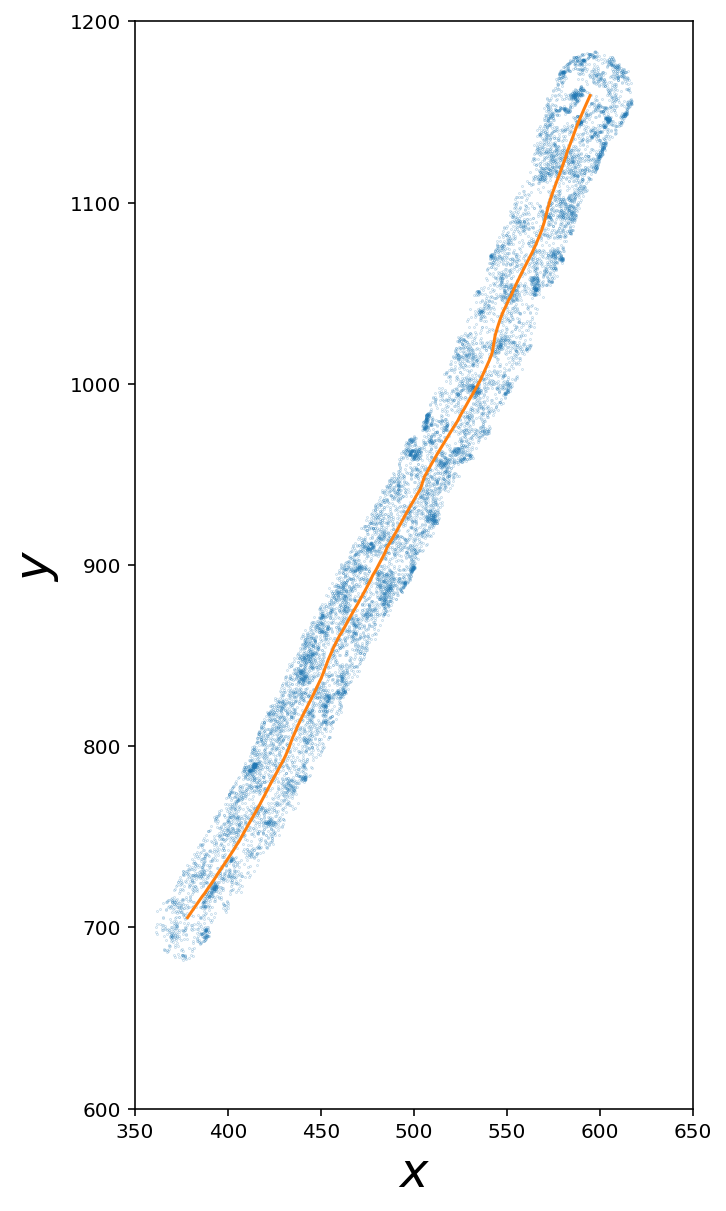

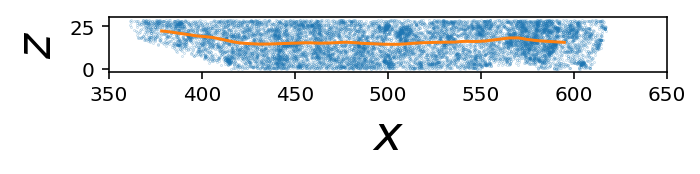

In [8]:
fig = figure(1, [5, 10])
# fig.add_subplot(121)
plot(localizations.x, localizations.y, '.', ms=0.2)
plot(medial_axis.x, medial_axis.y)
xlim(350, 650)
ylim(600, 1200)
xlabel(r'$x$', fontsize=24)
ylabel(r'$y$', fontsize=24);

fig = figure(2, [5, 0.5])
# fig.add_subplot(122)
plot(localizations.x, localizations.z, '.', ms=0.2)
plot(medial_axis.x, medial_axis.z)
# xlim(200, 800)
xlim(350, 650)
xlabel(r'$x$', fontsize=24)
ylabel(r'$z$', fontsize=24);

# Goal 1:  Use the localization data to characterize geometry of the cell

# Goal 2: Use the Stokes-Einstein relation to estimate the effective viscosity of the cytoplasm

Assume that $X(t)$ is a Brownian motion in $\mathbb{R}^3$ so that $\Delta X_{\tau} \sim N(0, \tau\sigma^2)$, where $\Delta X_{\tau} = X(t_2) - X(t_1)$ with $\tau = t_2 - t_1 > 0$.


The relationship between particle motion $X(t)$ and fluid viscosity $\eta$ (in ${\rm mPa\cdot s})$ is given by
$$ E[\frac{\Vert \Delta X_{\tau}\Vert ^2}{6\tau}] = \frac{k_B T}{6\pi \eta r},$$
where
  - $k_B T \approx 4.1 \, {\rm nN\cdot \mu m}$ is Boltzmann constant times the absolute temperature (in Kelvin).
  - $r=0.02\,{\rm \mu m}$ is the radius of GEMS particles
  - $\Delta X$ is measured in micrometers 
  - $\tau$ is measured in seconds

# Goal 3: Use the localization data and medial axis curves to spatially resolve GEMS density in the cell